In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv("drug.csv")

# Display the first few rows of the dataset
print(df.head())


   Age Sex      BP Cholesterol  Na_to_K   Drug
0   23   F    HIGH        HIGH   25.355  drugY
1   47   M     LOW        HIGH   13.093  drugC
2   47   M     LOW        HIGH   10.114  drugC
3   28   F  NORMAL        HIGH      NaN  drugX
4   61   F     LOW        HIGH   18.043  drugY


In [3]:
df['Age'].fillna(df['Age'].mean(), inplace=True)

# Impute missing values in the 'Sex' column with the most frequent value
df['Sex'].fillna(df['Sex'].mode()[0], inplace=True)

# Impute missing values in the 'BP' column with the most frequent value
df['BP'].fillna(df['BP'].mode()[0], inplace=True)

# Impute missing values in the 'Cholesterol' column with the most frequent value
df['Cholesterol'].fillna(df['Cholesterol'].mode()[0], inplace=True)
df['Na_to_K'].fillna(df['Na_to_K'].mode()[0], inplace=True)

# Verify that missing values have been handled
print("After handling missing values:")
print(df.isnull().sum())

# Encoding categorical variables
label_encoder = LabelEncoder()
df['Sex'] = label_encoder.fit_transform(df['Sex'])
df['BP'] = label_encoder.fit_transform(df['BP'])
df['Cholesterol'] = label_encoder.fit_transform(df['Cholesterol'])

# Display the modified dataset
print("Modified dataset:")
print(df.head())

# Save the preprocessed data to a new CSV file if needed
df.to_csv("preprocessed_data.csv", index=False)

After handling missing values:
Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64
Modified dataset:
   Age  Sex  BP  Cholesterol  Na_to_K   Drug
0   23    0   0            0   25.355  drugY
1   47    1   1            0   13.093  drugC
2   47    1   1            0   10.114  drugC
3   28    0   2            0   12.006  drugX
4   61    0   1            0   18.043  drugY


In [4]:


# Load the preprocessed data (assuming it's stored in preprocessed_data.csv)
url = "preprocessed_data.csv"  # Replace with the actual path
df = pd.read_csv(url)

# Define the features (X) and target variable (y)
X = df[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']]
y = df['Drug']

# Initialize variables to store results
accuracies = []
tree_sizes = []
information_gains = []

# Experiment loop
for _ in range(5):
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=None)  # Set a seed for reproducibility

    # Create a decision tree classifier with "entropy" criterion
    dt_classifier = DecisionTreeClassifier(criterion='entropy')

    # Train the model
    dt_classifier.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = dt_classifier.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

    # Record the size of the decision tree
    tree_sizes.append(dt_classifier.tree_.node_count)

    # Calculate Information Gain (related to entropy)
    information_gain = np.sum(dt_classifier.tree_.compute_feature_importances(normalize=False))
    information_gains.append(information_gain)

# Display results
for i in range(5):
    print(f"Experiment {i+1} - Decision Tree Size: {tree_sizes[i]}, Accuracy: {accuracies[i]}, Information Gain: {information_gains[i]}")

# Compare the results and select the model with the highest overall performance
best_experiment = accuracies.index(max(accuracies))
print(f"\nBest Performing Model - Decision Tree Size: {tree_sizes[best_experiment]}, Accuracy: {accuracies[best_experiment]}, Information Gain: {information_gains[best_experiment]}")


Experiment 1 - Decision Tree Size: 11, Accuracy: 0.9833333333333333, Information Gain: 1.9560654412529914
Experiment 2 - Decision Tree Size: 11, Accuracy: 0.9833333333333333, Information Gain: 1.9241433729787105
Experiment 3 - Decision Tree Size: 11, Accuracy: 1.0, Information Gain: 2.0398381393531624
Experiment 4 - Decision Tree Size: 11, Accuracy: 1.0, Information Gain: 1.9591256905273964
Experiment 5 - Decision Tree Size: 11, Accuracy: 0.9833333333333333, Information Gain: 1.9797889766743464

Best Performing Model - Decision Tree Size: 11, Accuracy: 1.0, Information Gain: 2.0398381393531624


Experiment Report with Information Gain:
   Split Ratio  Mean Accuracy (Info Gain)  Max Accuracy (Info Gain)  \
0          0.3                   0.972857                  0.992857   
1          0.4                   0.980000                  0.991667   
2          0.5                   0.982000                  1.000000   
3          0.6                   0.985000                  1.000000   
4          0.7                   0.983333                  1.000000   

   Min Accuracy (Info Gain)  Mean Tree Size (Info Gain)  \
0                  0.935714                        11.4   
1                  0.966667                        11.0   
2                  0.970000                        11.0   
3                  0.975000                        11.0   
4                  0.966667                        11.0   

   Max Tree Size (Info Gain)  Min Tree Size (Info Gain)  
0                         13                         11  
1                         11                         11  
2  

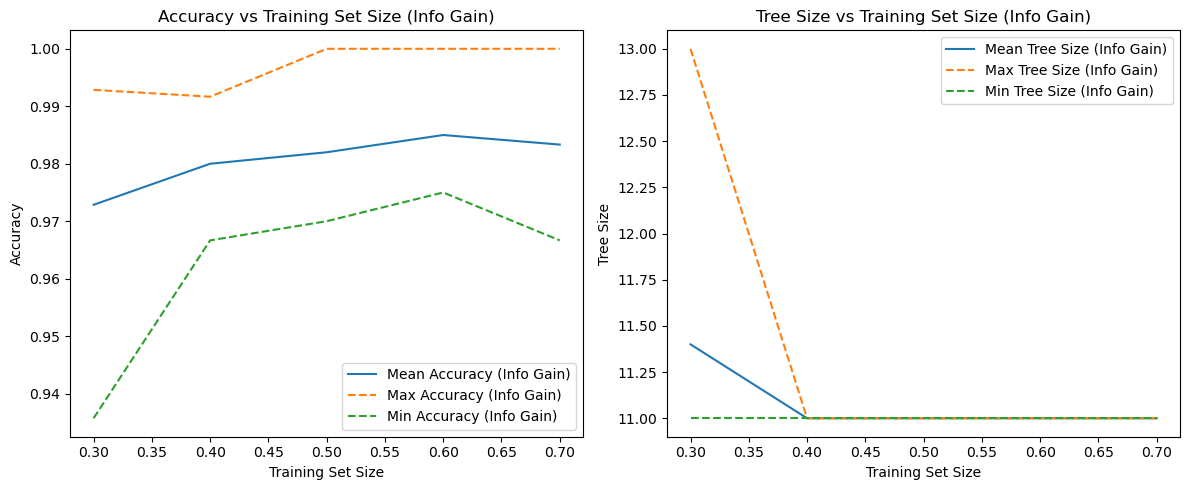

In [5]:


# Load the preprocessed data (assuming it's stored in preprocessed_data.csv)
url = "preprocessed_data.csv"  # Replace with the actual path
df = pd.read_csv(url)

# Define the features (X) and target variable (y)
X = df[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']]
y = df['Drug']

# Initialize variables to store results
split_ratios = np.arange(0.3, 0.8, 0.1)
mean_accuracies_info_gain = []
max_accuracies_info_gain = []
min_accuracies_info_gain = []
mean_tree_sizes_info_gain = []
max_tree_sizes_info_gain = []
min_tree_sizes_info_gain = []

# Experiment loop
for split_ratio in split_ratios:
    accuracies_info_gain = []
    tree_sizes_info_gain = []

    # Run the experiment with five different random seeds
    for seed in range(5):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1 - split_ratio, random_state=seed)

        dt_classifier_info_gain = DecisionTreeClassifier(criterion='entropy')
        dt_classifier_info_gain.fit(X_train, y_train)

        y_pred_info_gain = dt_classifier_info_gain.predict(X_test)

        accuracy_info_gain = accuracy_score(y_test, y_pred_info_gain)
        accuracies_info_gain.append(accuracy_info_gain)

        tree_sizes_info_gain.append(dt_classifier_info_gain.tree_.node_count)

    # Calculate statistics
    mean_accuracies_info_gain.append(np.mean(accuracies_info_gain))
    max_accuracies_info_gain.append(np.max(accuracies_info_gain))
    min_accuracies_info_gain.append(np.min(accuracies_info_gain))
    mean_tree_sizes_info_gain.append(np.mean(tree_sizes_info_gain))
    max_tree_sizes_info_gain.append(np.max(tree_sizes_info_gain))
    min_tree_sizes_info_gain.append(np.min(tree_sizes_info_gain))

# Display statistics
report_df_info_gain = pd.DataFrame({
    'Split Ratio': split_ratios,
    'Mean Accuracy (Info Gain)': mean_accuracies_info_gain,
    'Max Accuracy (Info Gain)': max_accuracies_info_gain,
    'Min Accuracy (Info Gain)': min_accuracies_info_gain,
    'Mean Tree Size (Info Gain)': mean_tree_sizes_info_gain,
    'Max Tree Size (Info Gain)': max_tree_sizes_info_gain,
    'Min Tree Size (Info Gain)': min_tree_sizes_info_gain
})

print("Experiment Report with Information Gain:")
print(report_df_info_gain)

# Create plots
plt.figure(figsize=(12, 5))

# Accuracy vs Training Set Size
plt.subplot(1, 2, 1)
plt.plot(split_ratios, mean_accuracies_info_gain, label='Mean Accuracy (Info Gain)')
plt.plot(split_ratios, max_accuracies_info_gain, label='Max Accuracy (Info Gain)', linestyle='--')
plt.plot(split_ratios, min_accuracies_info_gain, label='Min Accuracy (Info Gain)', linestyle='--')
plt.title('Accuracy vs Training Set Size (Info Gain)')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.legend()

# Tree Size vs Training Set Size
plt.subplot(1, 2, 2)
plt.plot(split_ratios, mean_tree_sizes_info_gain, label='Mean Tree Size (Info Gain)')
plt.plot(split_ratios, max_tree_sizes_info_gain, label='Max Tree Size (Info Gain)', linestyle='--')
plt.plot(split_ratios, min_tree_sizes_info_gain, label='Min Tree Size (Info Gain)', linestyle='--')
plt.title('Tree Size vs Training Set Size (Info Gain)')
plt.xlabel('Training Set Size')
plt.ylabel('Tree Size')
plt.legend()

plt.tight_layout()
plt.show()
